### Import Library

In [ ]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import shutil

## GATHERING AND LOAD THE DATA

### Connect to Google Drive

In [ ]:
# import zipfile

# with zipfile.ZipFile('/content/drive/MyDrive/dataset/Dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('Dataset_folder')

### Extract the ZIP file to the folder

In [ ]:
import zipfile

zip_filename = "Dataset.zip"

# Ekstrak file ZIP tanpa target folder
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

print("File ZIP diekstrak.")

File ZIP diekstrak.


In [ ]:
# import shutil
# import os

# # Tentukan path ke folder yang ingin dihapus
# folder_path = '/content/Dataset'

# # Cek apakah folder ada
# if os.path.exists(folder_path):
#     # Hapus folder beserta isinya
#     shutil.rmtree(folder_path)
#     print(f'Folder "{folder_path}" telah dihapus.')
# else:
#     print(f'Folder "{folder_path}" tidak ditemukan.')

Folder "/content/Dataset" telah dihapus.


In [ ]:
# import zipfile
# import os

# # Path ke file ZIP yang ingin diekstrak
# zip_filename = '/content/Dataset.zip'
# # Folder tujuan untuk ekstraksi
# extraction_folder = '/content/Dataset'

# # Cek apakah file ZIP ada
# if os.path.exists(zip_filename):
#     try:
#         # Ekstrak file ZIP
#         with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
#             zip_ref.extractall(extraction_folder)  # Tentukan folder tujuan ekstraksi
#         print(f"File ZIP diekstrak ke '{extraction_folder}'.")
#     except zipfile.BadZipFile:
#         print("File ZIP tidak valid. Pastikan file tidak rusak.")
# else:
#     print("File ZIP tidak ditemukan.")

File ZIP tidak valid. Pastikan file tidak rusak.


### Create Test set and Valid set in Acne Dataset from train dataset

In [ ]:
# import shutil
# import os

# # Tentukan path ke folder yang ingin dihapus
# folder_path = '/content/Dataset'

# # Cek apakah folder ada
# if os.path.exists(folder_path):
#     # Hapus folder beserta isinya
#     shutil.rmtree(folder_path)
#     print(f'Folder "{folder_path}" telah dihapus.')
# else:
#     print(f'Folder "{folder_path}" tidak ditemukan.')

Folder "/content/Dataset" telah dihapus.


In [ ]:
# import os
# import shutil
# import random

# def create_test_valid_sets(source_path, test_size=0.1, valid_size=0.1):
#     """
#     Membuat test dan validation sets dari dataset train.
#     """
#     base_dir = os.path.dirname(source_path) # Get the parent directory of the source path

#     # Buat folder train, test, dan valid within the parent directory
#     train_path = os.path.join(base_dir, 'train')
#     test_path = os.path.join(base_dir, 'test')
#     valid_path = os.path.join(base_dir, 'valid')
#     os.makedirs(test_path, exist_ok=True) # Only create test and valid if they don't exist
#     os.makedirs(valid_path, exist_ok=True)

#     # Dapatkan semua file dalam folder Acne/train
#     files = os.listdir(source_path)
#     n_files = len(files)

#     # Hitung jumlah file untuk test dan valid
#     n_test = int(n_files * test_size)
#     n_valid = int(n_files * valid_size)

#     # Acak file
#     random.shuffle(files)

#     # Pisahkan file untuk train, test, dan valid
#     test_files = files[:n_test]
#     valid_files = files[n_test:n_test + n_valid]
#     train_files = files[n_test + n_valid:]

#     # Copy file ke folder train, test, dan valid
#     for file in test_files:
#         src = os.path.join(source_path, file)
#         dst = os.path.join(test_path, file)
#         shutil.copy2(src, dst)

#     for file in valid_files:
#         src = os.path.join(source_path, file)
#         dst = os.path.join(valid_path, file)
#         shutil.copy2(src, dst)



#     print(f"Total file: {n_files}")
#     print(f"File untuk train: {len(train_files)}")
#     print(f"File untuk test: {len(test_files)}")
#     print(f"File untuk valid: {len(valid_files)}")

#     return len(test_files), len(valid_files)


# # Set random seed untuk reproducibility
# random.seed(42)

# # Path ke folder Acne
# acne_dir = '/content/Dataset/DATA2/Skin Condition/train/Acne'

# print("Membuat dataset train, test, dan valid untuk Acne...")
# test_dir_acne, val_dir_acne = create_test_valid_sets(acne_dir)

# print(f"\nTotal dataset Acne:")
# print(f"Created test set with total {test_dir_acne} images")
# print(f"Created validation set with total {val_dir_acne} images")

Membuat dataset train, test, dan valid untuk Acne...
Total file: 1833
File untuk train: 1467
File untuk test: 183
File untuk valid: 183

Total dataset Acne:
Created test set with total 183 images
Created validation set with total 183 images


#### Create Freckles test set from Validation set

In [ ]:
# import os
# import shutil
# import random

# def create_test_from_valid(valid_path, test_size=0.5):
#     """
#     Membuat test set dari valid folder
#     """
#     # Buat folder test jika belum ada
#     test_path = os.path.join(os.path.dirname(valid_path), 'test')

#     if not os.path.exists(test_path):
#         os.makedirs(test_path)

#     # Dapatkan semua file dari valid folder
#     files = os.listdir(valid_path)

#     # Hitung jumlah file untuk test
#     n_files = len(files)
#     n_test = int(n_files * test_size)

#     # Acak file
#     random.shuffle(files)

#     # Pisahkan file untuk test
#     test_files = files[:n_test]

#     # Copy file ke folder test
#     for file in test_files:
#         src = os.path.join(valid_path, file)
#         dst = os.path.join(test_path, file)
#         shutil.copy2(src, dst)

#     return len(test_files)

# # Set random seed untuk reproducibility
# random.seed(42)

# # Membuat test set untuk Freckles dari folder valid
# val_dir_freckles = '/content/Dataset/DATA2/Skin Condition/valid/Freckles'
# test_dir_freckles = create_test_from_valid(val_dir_freckles)
# print(f"\nFreckles dataset:")
# print(f"Created test set with {test_dir_freckles} images from valid folder")


Freckles dataset:
Created test set with 167 images from valid folder


### Check the Size from all the Dataset

In [ ]:
import os

def count_images_in_directory(directory):
    """
    Counts the number of image files in a given directory.

    Args:
        directory: The path to the directory containing the images.

    Returns:
        The count of image files in the directory.
    """
    # List all files in the directory and filter for image files
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    return len(files)

def count_images_in_subclasses(base_directory):
    """
    Counts the number of images in all sub-classes under a base directory.

    Args:
        base_directory: The path to the base directory containing sub-classes.

    Returns:
        A dictionary with subclass names as keys and image counts as values.
    """
    subclass_counts = {}
    for subclass in os.listdir(base_directory):
        subclass_path = os.path.join(base_directory, subclass)
        if os.path.isdir(subclass_path):  # Check if it's a directory
            subclass_counts[subclass] = count_images_in_directory(subclass_path)
    return subclass_counts

# File paths for the datasets
datasets = {
    'Acne': {
        'train': '/content/Dataset/Skin Condition/train/Acne',
        'valid': '/content/Dataset/Skin Condition/valid/Acne',
        'test': '/content/Dataset/Skin Condition/test/Acne'
    },
    'Comedo': {
        'train': '/content/Dataset/Skin Condition/train/Comedo',
        'valid': '/content/Dataset/Skin Condition/valid/Comedo',
        'test': '/content/Dataset/Skin Condition/test/Comedo'
    },
    'Freckles': {
        'train': '/content/Dataset/Skin Condition/train/Comedo',
        'valid': '/content/Dataset/Skin Condition/valid/Freckles',
        'test': '/content/Dataset/Skin Condition/test/Freckles'
    },
    'Redness': {
        'train': '/content/Dataset/Skin Condition/train/Redness',
        'valid': '/content/Dataset/Skin Condition/valid/Redness',
        'test': '/content/Dataset/Skin Condition/test/Redness'
    }

}

# Count images in each dataset and sub-classes
for dataset_name, paths in datasets.items():
    print(f"Dataset: {dataset_name}")
    for split_name, path in paths.items():
        if dataset_name in ['Skin Tone', 'Skin Type']:
            subclass_counts = count_images_in_subclasses(path)
            for subclass, count in subclass_counts.items():
                print(f"  {split_name} set - {subclass}: {count} images")
        else:
            count = count_images_in_directory(path)
            print(f"  {split_name} set: {count} images")

Dataset: Acne
  train set: 1836 images
  valid set: 183 images
  test set: 183 images
Dataset: Comedo
  train set: 2218 images
  valid set: 213 images
  test set: 106 images
Dataset: Freckles
  train set: 2218 images
  valid set: 334 images
  test set: 167 images
Dataset: Redness
  train set: 392 images
  valid set: 60 images
  test set: 10 images


### Check the size of the Skin Condition Dataset

In [ ]:
import os

def count_images_in_directory(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    image_files = [f for f in files if os.path.splitext(f)[1].lower() in image_extensions]
    return len(image_files)

datasets = {
    'Skin Condition': {
        'train': '/content/Dataset/Skin Condition/train',
        'valid': '/content/Dataset/Skin Condition/valid',
        'test': '/content/Dataset/Skin Condition/test'
    }
}

# Memeriksa jumlah gambar di setiap subdirektori
for dataset_name, paths in datasets.items():
    print(f"Dataset: {dataset_name}")
    for split_name, path in paths.items():
        print(f"Checking path: {path}")
        if os.path.exists(path):
            for subclass in os.listdir(path):
                subclass_path = os.path.join(path, subclass)
                if os.path.isdir(subclass_path):
                    count = count_images_in_directory(subclass_path)
                    print(f"  {split_name} set - {subclass}: {count} images")
        else:
            print(f"  {split_name} path does not exist.")

Dataset: Skin Condition
Checking path: /content/Dataset/Skin Condition/train
  train set - Freckles: 2248 images
  train set - Redness: 392 images
  train set - Acne: 1836 images
  train set - Comedo: 2217 images
Checking path: /content/Dataset/Skin Condition/valid
  valid set - Freckles: 333 images
  valid set - Redness: 60 images
  valid set - Acne: 183 images
  valid set - Comedo: 212 images
Checking path: /content/Dataset/Skin Condition/test
  test set - Freckles: 167 images
  test set - Redness: 10 images
  test set - Acne: 183 images
  test set - Comedo: 105 images


#### Check the size of the Skin Type

In [ ]:
# import os

# def count_images_in_directory(directory):

#     files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
#     return len(files)

# def count_images_in_subclasses(base_directory):

#     subclass_counts = {}
#     for subclass in os.listdir(base_directory):
#         subclass_path = os.path.join(base_directory, subclass)
#         if os.path.isdir(subclass_path):  # Check if it's a directory
#             subclass_counts[subclass] = count_images_in_directory(subclass_path)
#     return subclass_counts


# datasets = {

#     'Skin Type': {
#         'train': '/content/Dataset/Skin Type/train',
#         'valid': '/content/Dataset/Skin Type/valid',
#         'test': '/content/Dataset/Skin Type/test'
#     }
# }


# for dataset_name, paths in datasets.items():
#     print(f"Dataset: {dataset_name}")
#     for split_name, path in paths.items():
#         if dataset_name in ['Skin Tone', 'Skin Type']:
#             subclass_counts = count_images_in_subclasses(path)
#             for subclass, count in subclass_counts.items():
#                 print(f"  {split_name} set - {subclass}: {count} images")
#         else:
#             count = count_images_in_directory(path)
#             print(f"  {split_name} set: {count} images")

Dataset: Skin Type
  train set - dry: 652 images
  train set - normal: 1104 images
  train set - oily: 1000 images
  valid set - dry: 71 images
  valid set - normal: 111 images
  valid set - oily: 80 images
  test set - dry: 35 images
  test set - normal: 59 images
  test set - oily: 40 images


### 5 Example of the images from the Dataset

Displaying 5 example images from the Dataset:


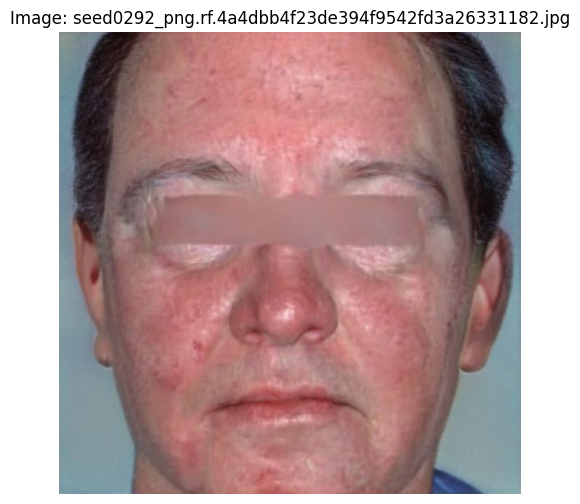

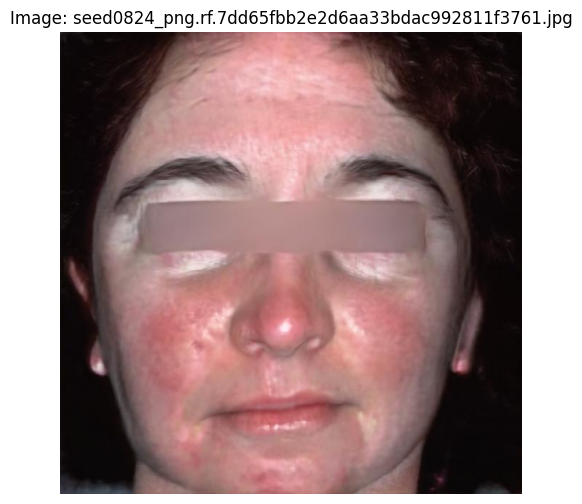

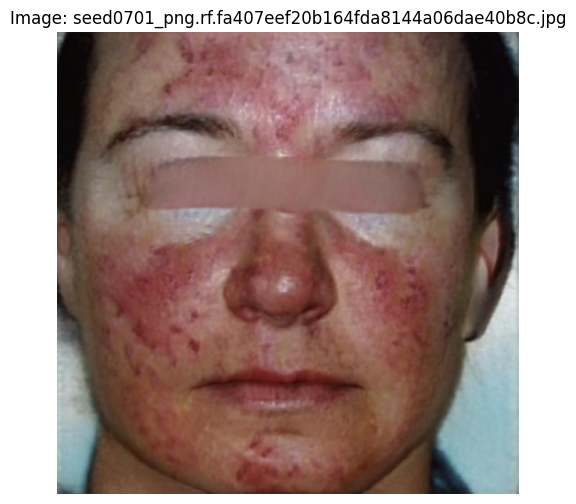

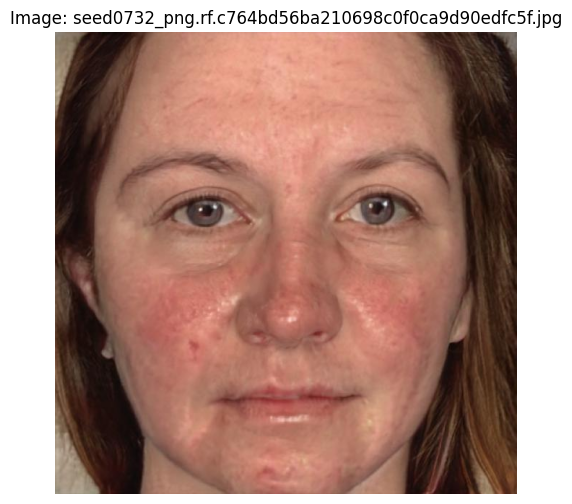

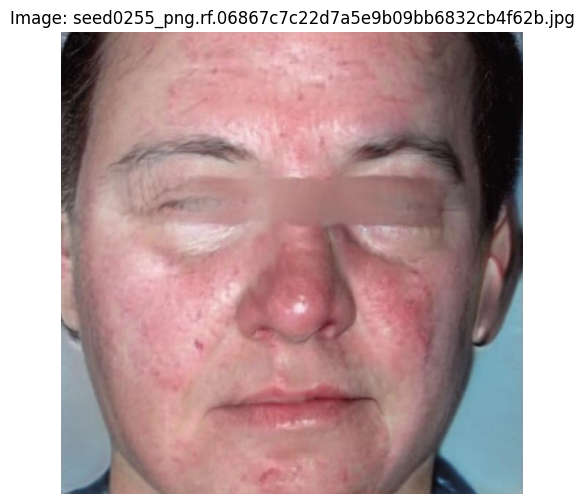

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to the directory containing the Dataset images
dataset_dir = "/content/Dataset/Skin Condition/train/Redness"

# List all files in the directory
image_files = [f for f in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, f))]

# Display the first 5 images
print("Displaying 5 example images from the Dataset:")
for i in range(min(5, len(image_files))):
    img_path = os.path.join(dataset_dir, image_files[i])
    img = mpimg.imread(img_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

## PREPROCESSING IMAGES

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Preprocessing Skin Condition dataset

In [ ]:
batch_size = 64
image_size = (224, 224)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base directory path
base_dir = '/content/Dataset/'

# Define directories for Skin Condition
skin_condition_train = base_dir + 'Skin Condition/train'
skin_condition_valid = base_dir + 'Skin Condition/valid'
skin_condition_test = base_dir + 'Skin Condition/test'

# Create ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi ke rentang [0, 1]
    rotation_range=20,  # Rotasi acak hingga 20 derajat
    width_shift_range=0.2,  # Pergeseran horizontal acak
    height_shift_range=0.2,  # Pergeseran vertikal acak
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zoom acak
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'  # Pengisian untuk piksel yang hilang
)

# Create ImageDataGenerator for validation and test data (only rescaling)
valid_test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi ke rentang [0, 1]

# Create data generators for Skin Condition
train_generator_skin_condition = train_datagen.flow_from_directory(
    skin_condition_train,
    target_size=image_size,  # Ukuran gambar yang diinginkan
    batch_size=batch_size,  # Ukuran batch
    class_mode='categorical'  # Mode klasifikasi (multi-kelas)
)

validation_generator_skin_condition = valid_test_datagen.flow_from_directory(
    skin_condition_valid,
    target_size=image_size,  # Ukuran gambar yang diinginkan
    batch_size=batch_size,  # Ukuran batch
    class_mode='categorical'  # Mode klasifikasi (multi-kelas)
)

test_generator_skin_condition = valid_test_datagen.flow_from_directory(
    skin_condition_test,
    target_size=image_size,  # Ukuran gambar yang diinginkan
    batch_size=batch_size,  # Ukuran batch
    class_mode='categorical'  # Mode klasifikasi (multi-kelas)
)

Found 6693 images belonging to 4 classes.
Found 788 images belonging to 4 classes.
Found 465 images belonging to 4 classes.


#### Preprocessing For Dataset Skin Tone

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define base directory path
# base_dir = '/content/Dataset/'

# # Define directories for Skin Tone
# skin_tone_train = base_dir + 'Skin Tone/train'
# skin_tone_valid = base_dir + 'Skin Tone/valid'
# skin_tone_test = base_dir + 'Skin Tone/test'

# # Create ImageDataGenerator for training data with augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Create ImageDataGenerator for validation and test data (only rescaling)
# valid_test_datagen = ImageDataGenerator(rescale=1./255)

# # Create data generators for Skin Tone
# train_generator_skin_tone = train_datagen.flow_from_directory(
#     skin_tone_train,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )

# validation_generator_skin_tone = valid_test_datagen.flow_from_directory(
#     skin_tone_valid,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )

# test_generator_skin_tone = valid_test_datagen.flow_from_directory(
#     skin_tone_test,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )

Found 1500 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


#### Preprocessing For Dataset Skin Type

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define base directory path (if not already defined)
# base_dir = '/content/Dataset/'

# # Define directories for Skin Type
# skin_type_train = base_dir + 'Skin Type/train'
# skin_type_valid = base_dir + 'Skin Type/valid'
# skin_type_test = base_dir + 'Skin Type/test'

# # Create ImageDataGenerator for training data with augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Create ImageDataGenerator for validation and test data (only rescaling)
# valid_test_datagen = ImageDataGenerator(rescale=1./255)

# # Create data generators for Skin Type
# train_generator_skin_type = train_datagen.flow_from_directory(
#     skin_type_train,
#     target_size=(224, 224),
#     batch_size=64,
#     class_mode='categorical'
# )

# validation_generator_skin_type = valid_test_datagen.flow_from_directory(
#     skin_type_valid,
#     target_size=(224, 224),
#     batch_size=64,
#     class_mode='categorical'
# )

# test_generator_skin_type = valid_test_datagen.flow_from_directory(
#     skin_type_test,
#     target_size=(224, 224),
#     batch_size=64,
#     class_mode='categorical'
# )

Found 2756 images belonging to 3 classes.
Found 262 images belonging to 3 classes.
Found 134 images belonging to 3 classes.


### Create model with Functional API

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate

# # Input layer
# input_img = Input(shape=(224, 224, 3))

# # Convolutional layers for image processing
# x = Conv2D(32, (3, 3), activation='relu')(input_img)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Flatten()(x)

# # Separate branches for each output
# skin_condition_branch = Dense(64, activation='relu')(x)
# skin_condition_output = Dense(len(train_generator_skin_condition.class_indices), activation='softmax', name='skin_condition')(skin_condition_branch)

# skin_tone_branch = Dense(64, activation='relu')(x)
# skin_tone_output = Dense(len(train_generator_skin_tone.class_indices), activation='softmax', name='skin_tone')(skin_tone_branch)

# skin_type_branch = Dense(64, activation='relu')(x)
# skin_type_output = Dense(len(train_generator_skin_type.class_indices), activation='softmax', name='skin_type')(skin_type_branch)

# # Create the model with multiple outputs
# model = Model(inputs=input_img, outputs=[skin_condition_output, skin_tone_output, skin_type_output])

# # Compile the model
# model.compile(optimizer='adam',
#               loss={'skin_condition': 'categorical_crossentropy', 'skin_tone': 'categorical_crossentropy', 'skin_type': 'categorical_crossentropy'},
#               metrics={'skin_condition': 'accuracy', 'skin_tone': 'accuracy', 'skin_type': 'accuracy'})

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(
#     train_generator_skin_condition,
#     validation_data=validation_generator_skin_condition,
#     epochs=10,
#     verbose=1
# )

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 222, 222, 32)   │            896 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 111, 111, 32)   │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 109, 109, 64)   │         18,496 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 54, 54, 64)     │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 186624)         │              0 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │     11,944,000 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │     11,944,000 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 64)             │     11,944,000 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ skin_condition (Dense)    │ (None, 3)              │            195 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ skin_tone (Dense)         │ (None, 3)              │            195 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ skin_type (Dense)         │ (None, 3)              │            195 │ dense_8[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 35,851,977 (136.76 MB)

 Trainable params: 35,851,977 (136.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 692s 4s/step - loss: 1.0713 - skin_condition_accuracy: 0.6798 - val_loss: 0.8023 - val_skin_condition_accuracy: 0.6648
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 690s 4s/step - loss: 0.3747 - skin_condition_accuracy: 0.8580 - val_loss: 0.7218 - val_skin_condition_accuracy: 0.7129
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 743s 4s/step - loss: 0.3164 - skin_condition_accuracy: 0.8849 - val_loss: 0.9762 - val_skin_condition_accuracy: 0.6332
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 720s 4s/step - loss: 0.2615 - skin_condition_accuracy: 0.9024 - val_loss: 0.4341 - val_skin_condition_accuracy: 0.8530
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 687s 3s/step - loss: 0.2304 - skin_condition_accuracy: 0.9131 - val_loss: 0.6247 - val_skin_condition_accuracy: 0.7610
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 737s 3s/step - loss: 0.2264 - skin_condition_accuracy: 0.9144 - val_loss: 0.3943 - val_skin_condition_accuracy: 0.8668
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 679s 3

### Model with Functional API 1

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Input layer
input_img = Input(shape=(224, 224, 3))

# Convolutional layers for image processing
x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)

# Output layer for skin condition
skin_condition_output = Dense(len(train_generator_skin_condition.class_indices), activation='softmax', name='skin_condition')(x)

# Create the model with a single output
model = Model(inputs=input_img, outputs=skin_condition_output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator_skin_condition,
    validation_data=validation_generator_skin_condition,
    epochs=20,
    verbose=1
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ skin_condition (Dense)               │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,796,420 (182.33 MB)

 Trainable params: 47,796,420 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 103s 918ms/step - accuracy: 0.5882 - loss: 1.6604 - val_accuracy: 0.5952 - val_loss: 0.9779
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 97s 890ms/step - accuracy: 0.8423 - loss: 0.4501 - val_accuracy: 0.8363 - val_loss: 0.5034
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 141s 896ms/step - accuracy: 0.8760 - loss: 0.3488 - val_accuracy: 0.8223 - val_loss: 0.5246
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 98s 909ms/step - accuracy: 0.8918 - loss: 0.2919 - val_accuracy: 0.7627 - val_loss: 0.6257
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 96s 891ms/step - accuracy: 0.8877 - loss: 0.2954 - val_accuracy: 0.8084 - val_loss: 0.5427
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 98s 906ms/step - accuracy: 0.9055 - loss: 0.2645 - val_accuracy: 0.8008 - val_loss: 0.4990
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 146s 954ms/step - accuracy: 0.9126 - loss: 0.2289 - val_accuracy: 0.8401 - val_loss: 0.4527
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 135s 889ms/step - accuracy: 0.9220 - los

### Model Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load the VGG16 model with pre-trained weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


# Add custom layers on top of the base model
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Increased number of neurons
x = Dropout(0.5)(x)  # Regularization
x = Dense(256, activation='relu')(x)  # Additional dense layer
x = Dropout(0.5)(x)
skin_condition_output = Dense(len(train_generator_skin_condition.class_indices), activation='softmax', name='skin_condition')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=skin_condition_output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator_skin_condition,
    validation_data=validation_generator_skin_condition,
    epochs=20,
    verbose=1
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,109,700 (57.64 MB)

 Trainable params: 395,012 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.6114 - loss: 0.9445 - val_accuracy: 0.7957 - val_loss: 0.5225
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.8286 - loss: 0.4654 - val_accuracy: 0.9010 - val_loss: 0.3186
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 141s 997ms/step - accuracy: 0.8624 - loss: 0.3920 - val_accuracy: 0.9226 - val_loss: 0.2631
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.8890 - loss: 0.3312 - val_accuracy: 0.8769 - val_loss: 0.3685
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9093 - loss: 0.2940 - val_accuracy: 0.8985 - val_loss: 0.2863
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9020 - loss: 0.2913 - val_accuracy: 0.9036 - val_loss: 0.3012
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 111s 993ms/step - accuracy: 0.9024 - loss: 0.3008 - val_accuracy: 0.9454 - val_loss: 0.1906
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 111s 994ms/step - accuracy: 0.9144 - loss: 0.2724 - val_accura

### Fine Tuning

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Fine-tuning: Unfreeze the last few layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model again with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model again with fine-tuning
history_finetune = model.fit(
    train_generator_skin_condition,
    validation_data=validation_generator_skin_condition,
    epochs=20,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9319 - loss: 0.2021 - val_accuracy: 0.9467 - val_loss: 0.1835
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9478 - loss: 0.1635 - val_accuracy: 0.9467 - val_loss: 0.1573
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9523 - loss: 0.1482 - val_accuracy: 0.9505 - val_loss: 0.1577
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9566 - loss: 0.1320 - val_accuracy: 0.9543 - val_loss: 0.1597
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9600 - loss: 0.1245 - val_accuracy: 0.9670 - val_loss: 0.1178
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9630 - loss: 0.1165 - val_accuracy: 0.9619 - val_loss: 0.1370
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9658 - loss: 0.1037 - val_accuracy: 0.9721 - val_loss: 0.1017
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9655 - loss: 0.1011 - val_accu

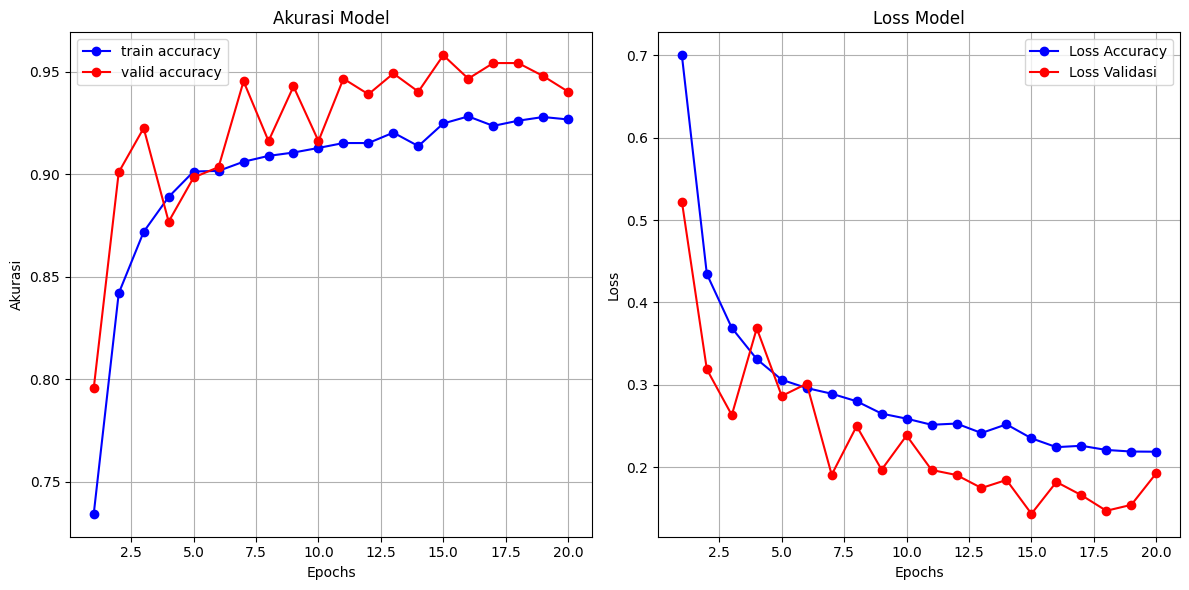

In [ ]:
import matplotlib.pyplot as plt

# Misalkan 'history' adalah objek yang dihasilkan dari model.fit()
# Ambil akurasi dan loss dari history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs
epochs = range(1, len(accuracy) + 1)

# Plot Akurasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='train accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='valid accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Loss Accuracy')
plt.plot(epochs, val_loss, 'ro-', label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Tampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Define input layer
# input_img = Input(shape=(224, 224, 3))

# # Build the model
# x = Conv2D(32, (3, 3), activation='relu')(input_img)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.25)(x)

# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.25)(x)

# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.25)(x)

# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)

# # Output layer
# skin_condition_output = Dense(len(train_generator_skin_condition.class_indices), activation='softmax')(x)

# # Create the model
# model = Model(inputs=input_img, outputs=skin_condition_output)

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# # Train the model
# history = model.fit(
#     train_generator_skin_condition,
#     validation_data=validation_generator_skin_condition,
#     epochs=20,
#     verbose=1,
#     callbacks=[early_stopping, reduce_lr]
# )

In [ ]:
import numpy as np

# Assuming your model is named 'model' and you have test_generator_skin_condition
# Evaluate the model on the test set for skin condition only
loss, accuracy = model.evaluate(test_generator_skin_condition, verbose=1)
print('Test accuracy for skin condition:', accuracy)

# Predict the skin condition for the test set
predictions = model.predict(test_generator_skin_condition, verbose=1)

# The predictions will be an array of shape (num_samples, num_classes)
# Find the class with the highest probability for each image
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test_generator_skin_condition.classes

# Optional: Calculate metrics like precision, recall, F1-score, confusion matrix, etc.
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(true_labels, predicted_classes))

# Print confusion matrix
print(confusion_matrix(true_labels, predicted_classes))

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9778 - loss: 0.0978
Test accuracy for skin condition: 0.9784946441650391
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step
              precision    recall  f1-score   support

           0       0.39      0.40      0.39       183
           1       0.25      0.24      0.24       105
           2       0.41      0.41      0.41       167
           3       0.00      0.00      0.00        10

    accuracy                           0.36       465
   macro avg       0.26      0.26      0.26       465
weighted avg       0.36      0.36      0.36       465

[[73 46 60  4]
 [43 25 34  3]
 [65 30 68  4]
 [ 6  1  3  0]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.9778 - loss: 0.0756
Test accuracy for skin condition: 0.9784946441650391
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step
              precision    recall  f1-score   support

        Acne       0.40      0.41      0.41       183
      Comedo       0.25      0.25      0.25       105
    Freckles       0.41      0.40      0.40       167
     Redness       0.00      0.00      0.00        10

    accuracy                           0.36       465
   macro avg       0.27      0.26      0.27       465
weighted avg       0.36      0.36      0.36       465



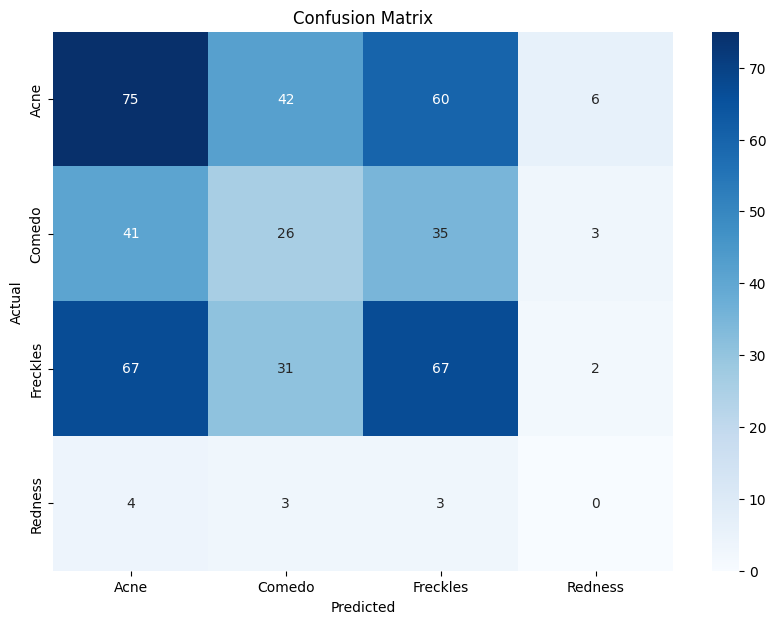

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your model is named 'model' and you have test_generator_skin_condition

# Evaluate the model on the test set for skin condition
loss, accuracy = model.evaluate(test_generator_skin_condition, verbose=1)
print('Test accuracy for skin condition:', accuracy)

# Predict the skin condition for the test set
predictions = model.predict(test_generator_skin_condition, verbose=1)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test_generator_skin_condition.classes

# Print classification report
print(classification_report(true_labels, predicted_classes, target_names=test_generator_skin_condition.class_indices.keys()))

# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator_skin_condition.class_indices.keys(),
            yticklabels=test_generator_skin_condition.class_indices.keys())

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Predict the test set image with index

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions: [[3.5858204e-05 7.8277044e-06 9.9539465e-01 4.5616399e-03]]
Predicted class index: 2


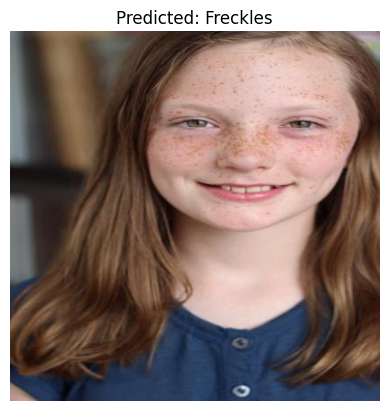

Predicted Skin Condition: Freckles


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load an image and preprocess it for the model."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

def predict_image(model, img_path):
    """Predict the skin condition of the loaded image."""
    # Load and preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])  # Ambil nilai integer dari array

    # Get the class labels
    class_labels = list(test_generator_skin_condition.class_indices.keys())

    # Debugging: Print predictions and predicted class index
    print(f'Predictions: {predictions}')
    print(f'Predicted class index: {predicted_class_index}')

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis('off')

    # Check if the predicted class index is valid
    if predicted_class_index < len(class_labels):
        plt.title(f'Predicted: {class_labels[predicted_class_index]}')
    else:
        plt.title(f'Predicted: Unknown Class')

    plt.show()

    return class_labels[predicted_class_index] if predicted_class_index < len(class_labels) else "Unknown Class"

# Contoh penggunaan:
# Ganti 'path/to/your/image.jpg' dengan path ke gambar yang ingin Anda prediksi
img_path = '/content/Dataset/Skin Condition/test/Freckles/045376f67f43d82bab6fbe8a87da4785_jpg.rf.b03eaddb91ee4f66376664b280c76895.jpg'
predicted_condition = predict_image(model, img_path)
print(f'Predicted Skin Condition: {predicted_condition}')

### Prediction with Probabilities class explanation


Prediction Probabilities:
--------------------------------------------------
Redness         :  44.79% | ██████████████████████
Freckles        :  38.12% | ███████████████████
Acne            :  17.05% | ████████
Comedo          :   0.04% | 
--------------------------------------------------
Most likely condition: Redness


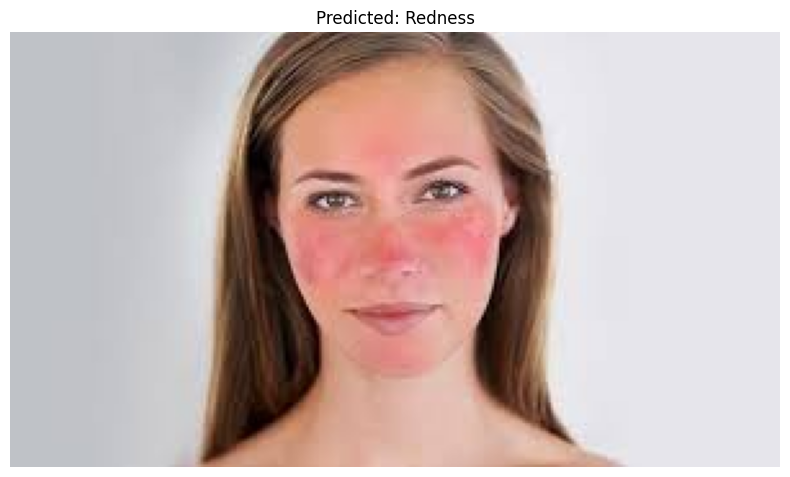

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load an image and preprocess it for the model."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def display_predictions(predictions, class_labels):
    """Display predictions with light blue bars and navy blue highlight for highest probability."""
    print("\nPrediction Probabilities:")
    print("-" * 50)

    # Get probabilities from the predictions array
    probs = predictions[0]

    # Create list of (probability, class_label) tuples
    prob_pairs = list(zip(probs, class_labels))

    # Sort by probability in descending order
    prob_pairs.sort(key=lambda x: x[0], reverse=True)

    # Get the highest probability for comparison
    highest_prob = prob_pairs[0][0]

    # Colors
    LIGHT_BLUE = '\033[38;5;117m'  # LIGHT BLUE for regular probabilities
    LAVENDER = '\033[38;5;189m'     # LAVENDER for highest probability
    RESET = '\033[0m'

    # Display each class probability with a colored bar
    for prob, label in prob_pairs:
        percentage = prob * 100
        bars = "█" * int(percentage / 2)  # Create a visual bar (1 block = 2%)

        # Use navy blue for highest probability, light blue for others
        color = LIGHT_BLUE if prob == highest_prob else LAVENDER
        print(f"{label:<15} : {percentage:>6.2f}% | {color}{bars}{RESET}")

    print("-" * 50)
    print(f"Most likely condition: {class_labels[np.argmax(predictions[0])]}")

def predict_image(model, img_path, class_labels):
    """Predict the skin condition of the loaded image with readable probabilities."""
    # Load and preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array, verbose=0)

    # Display the image with prediction
    plt.figure(figsize=(8, 10))
    plt.subplot(2, 1, 1)
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_labels[np.argmax(predictions[0])]}')

    # Display readable probabilities
    display_predictions(predictions, class_labels)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return class_labels[np.argmax(predictions[0])]

# Example usage:
class_labels = ['Acne', 'Comedo', 'Freckles', 'Redness']
img_path = '/content/dfse.jpg'
predicted_condition = predict_image(model, img_path, class_labels)

### Predicition and the Ouput Visualization


Prediction Probabilities:
--------------------------------------------------
Acne            :  99.94% | █████████████████████████████████████████████████
Redness         :   0.05% | 
Freckles        :   0.01% | 
Comedo          :   0.00% | 
--------------------------------------------------
Most likely condition: Acne


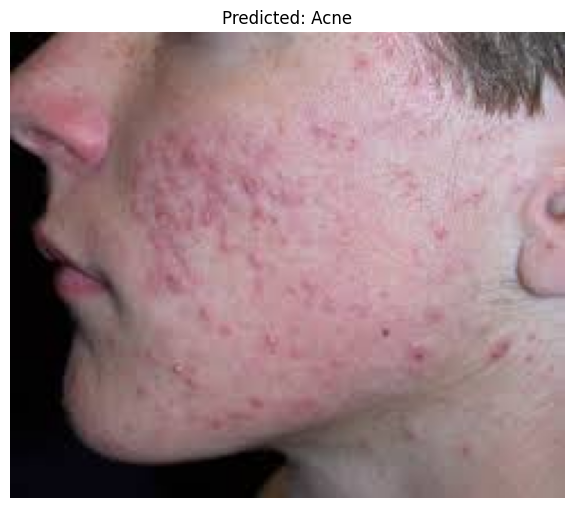

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load an image and preprocess it for the model."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def display_predictions(predictions, class_labels):
    """Display predictions in a clear, readable format."""
    print("\nPrediction Probabilities:")
    print("-" * 50)

    # Get probabilities from the prediction array
    probs = predictions[0]  # Access the correct array

    # Create list of (probability, class_label) tuples
    prob_pairs = list(zip(probs, class_labels))

    # Sort by probability in descending order
    prob_pairs.sort(key=lambda x: x[0], reverse=True)

    # Display each class probability with a simple bar
    for prob, label in prob_pairs:
        percentage = prob * 100
        bars = "█" * int(percentage / 2)  # Create a visual bar (1 block = 2%)
        print(f"{label:<15} : {percentage:>6.2f}% | {bars}")

    print("-" * 50)
    print(f"Most likely condition: {class_labels[np.argmax(predictions[0])]}")

def predict_image(model, img_path, class_labels):
    """Predict the skin condition of the loaded image with readable probabilities."""
    # Load and preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array, verbose=0)

    # Display the image with prediction
    plt.figure(figsize=(8, 10))
    plt.subplot(2, 1, 1)
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_labels[np.argmax(predictions)]}')

    # Display readable probabilities
    display_predictions(predictions, class_labels)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return class_labels[np.argmax(predictions)]

# Example usage:
class_labels = ['Acne', 'Comedo', 'Freckles', 'Redness']  # Your class labels
img_path = '/content/sjkhf.jpg'
predicted_condition = predict_image(model, img_path, class_labels)

### Save Model on h5 format

In [ ]:
import tensorflow as tf

# Memuat model dari file best_model.keras
model = tf.keras.models.load_model('best_model.keras')

# Menyimpan model ke format .h5
model.save('model.h5')

print("Model telah disimpan ke model.h5.")

Model telah disimpan ke model.h5.


### Save Model on Tfjs format

In [ ]:
!pip install tensorflowjs

!tensorflowjs_converter --input_format keras model.h5 tfjs_model_directory/

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully un

2024-11-20 11:03:35.424406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732100615.450382    1778 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732100615.458014    1778 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
# import shutil
# from google.colab import files

# # Tentukan direktori yang ingin di-zip
# directory_to_zip = '/content/Dataset'
# # Tentukan nama file ZIP yang akan dibuat
# zip_filename = '/content/Dataset'

# # Buat file ZIP
# shutil.make_archive(zip_filename, 'zip', directory_to_zip)

# # Download file ZIP
# files.download(zip_filename + '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Save Model

In [ ]:
# # Save the model in the h5 format
# model.save('my_model.h5')

In [ ]:
# !pip install tensorflowjs

# !tensorflowjs_converter --input_format keras model.h5 tfjs_model_directory/

In [ ]:
# Install tensorflow.js converter
!pip install tensorflowjs

# Import library yang dibutuhkan
import tensorflowjs as tfjs
import tensorflow as tf

# Path model H5 yang akan dikonversi
h5_model_path = '/content/model.h5'

# Path output untuk model tfjs
tfjs_model_path = '/content/Model'

# Load model H5
model = tf.keras.models.load_model(h5_model_path)

# Konversi model ke format TensorFlow.js
tfjs.converters.save_keras_model(model, tfjs_model_path)

print("Konversi model berhasil!")
print(f"Model TFJS disimpan di: {tfjs_model_path}")

failed to lookup keras version from the file,
    this is likely a weight only file
Konversi model berhasil!
Model TFJS disimpan di: /content/Model


In [ ]:
import shutil
from google.colab import files

# Path ke folder yang ingin di-zip
folder_path = '/content/Model'
# Nama file zip yang ingin dibuat
zip_file_path = '/content/model_js.zip'

# Mengompres folder menjadi file zip
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

# Mengunduh file zip
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

# Path model H5 yang akan dikonversi
h5_model_path = '/content/model.h5'

# Path output untuk model TFLite
tflite_model_path = '/content/model.tflite'

# Load model Keras
model = tf.keras.models.load_model(h5_model_path)

# Konversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Opsional: Optimasi model (kompresi ukuran)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi model
tflite_model = converter.convert()

# Simpan model TFLite
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("Konversi model berhasil!")
print(f"Model TFLite disimpan di: {tflite_model_path}")

Saved artifact at '/tmp/tmp3ahso1v0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  140708505867136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505872064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505872768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505876640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505877344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505898848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505898320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505895680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505900608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505896208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140708505901664

In [ ]:
import tensorflow as tf

# Step 1: Load the Keras model
model = tf.keras.models.load_model('model.h5')

# Step 2: Create a TFLiteConverter object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Step 3: Enable optimizations for speed
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

# Step 4: Convert the model to TFLite format
tflite_model = converter.convert()

# Step 5: Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been converted to TFLite format with optimizations for speed and saved as 'model_optimized.tflite'")

Saved artifact at '/tmp/tmpthtma9oo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139746173986672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746173991600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746173875152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746174062784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746174067536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746174064192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746174068592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746174063840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746174070880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746174068768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139746174071936

Model has been converted to TFLite format with optimizations for speed and saved as 'model_optimized.tflite'


In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

15194560